In [2]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.3 MB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.3 MB 4.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.5 MB/s eta 0:00:00


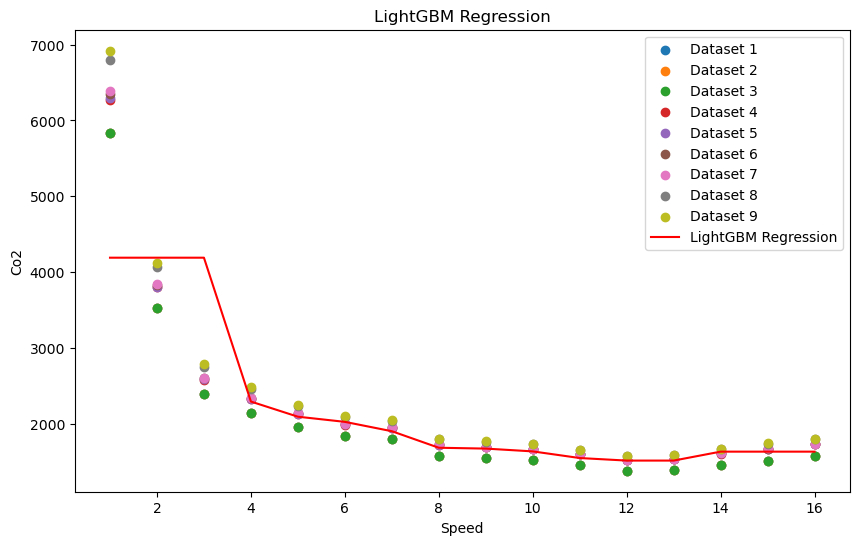

 Speed  Predicted Co2
     1    4189.477199
     2    4189.477199
     3    4189.477199
     4    2292.100270
     5    2092.473998
     6    2024.404059
     7    1901.094932
     8    1683.007523
     9    1671.811462
    10    1634.950551
    11    1547.405994
    12    1513.708005
    13    1513.708005
    14    1631.574871
    15    1631.574871
    16    1631.574871


In [4]:
# Not sure that the Plot working well[check graph]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
import dask
import os

# Set the 'dataframe.query.planner' key in Dask configuration
dask.config.set({"dataframe.query.planner": True})

# Assuming you have a list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files, assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Suppress the verbose output
with open(os.devnull, 'w') as f:
    lgbm_model = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100, verbose=-1)
    lgbm_model.fit(all_speed, all_rates)

# Predict using the model without printing verbose messages
lgbm_predictions = lgbm_model.predict(all_speed)

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.plot(speed, lgbm_model.predict(speed), color='red', label='LightGBM Regression')
plt.title('LightGBM Regression')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model and create a DataFrame with the predictions
predicted_co2_values = lgbm_model.predict(speed)
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted Co2': predicted_co2_values.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 1
[LightGBM] [Info] Start training from score 2208.613813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

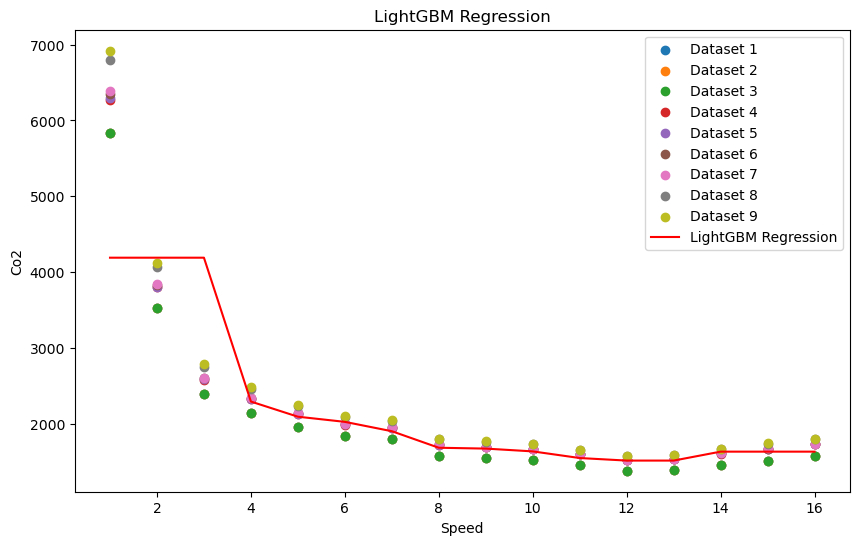

 Speed  Predicted Co2
     1    4189.477199
     2    4189.477199
     3    4189.477199
     4    2292.100270
     5    2092.473998
     6    2024.404059
     7    1901.094932
     8    1683.007523
     9    1671.811462
    10    1634.950551
    11    1547.405994
    12    1513.708005
    13    1513.708005
    14    1631.574871
    15    1631.574871
    16    1631.574871


In [3]:
# Not sure that the Plot working well with some unnecessary print [check graph]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
import dask

# Set the 'dataframe.query.planner' key in Dask configuration
dask.config.set({"dataframe.query.planner": True})

# Assuming you have a list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
rates_datasets = []

# Read datasets from Excel files, assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    rates_datasets.append(df['Co2'].values)

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Combine data from all datasets
all_speed = np.concatenate([speed] * len(rates_datasets))
all_rates = np.concatenate(rates_datasets)

# Create and fit the LightGBM model
lgbm_model = lgb.LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=100)
lgbm_model.fit(all_speed, all_rates)

# Predict using the model
lgbm_predictions = lgbm_model.predict(all_speed)

# Plot the results
plt.figure(figsize=(10, 6))
for i, rates_dataset in enumerate(rates_datasets):
    plt.scatter(speed, rates_dataset, label=f'Dataset {i+1}')
plt.plot(speed, lgbm_model.predict(speed), color='red', label='LightGBM Regression')
plt.title('LightGBM Regression')
plt.xlabel('Speed')
plt.ylabel('Co2')
plt.legend()
plt.show()

# Predict CO2 values for speed using the model and create a DataFrame with the predictions
predicted_co2_values = lgbm_model.predict(speed)
predicted_df = pd.DataFrame({
    'Speed': speed.flatten(),
    'Predicted Co2': predicted_co2_values.flatten()
})

# Print the DataFrame
print(predicted_df.to_string(index=False))
